<a href="https://colab.research.google.com/github/meduardajustino/Estudos-Python/blob/main/06_introdu%C3%A7%C3%A3o_ao_aprendizado_de_m%C3%A1quina_(2025_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
sns.set_style('ticks')

In [ ]:
# @title simulação de regressão
X, y, coef = make_regression(
    n_samples=20, random_state=42,
    n_features=1, noise=10.0,
    coef=True, bias=.5
)

y = (y - y.mean()) / y.std()

ax = sns.scatterplot(x=X[:,0], y=y, label='dados reais')
ax.set(xlabel='x (variável preditora)', ylabel='y (variável alvo)', title='Regressão')
plt.axis('equal')
plt.legend()
plt.show()

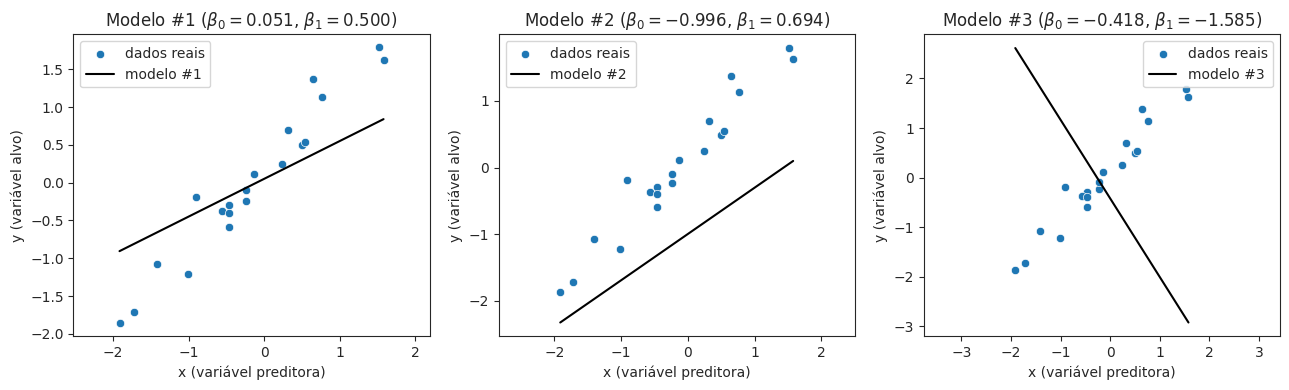

In [ ]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(13, 4))
np.random.seed(4)
for i, axe in enumerate(axes):
    ax = sns.scatterplot(x=X[:,0], y=y, label='dados reais', ax=axe)
    beta_0 = np.random.randn(1)
    beta_1 = np.random.randn(1)
    ax.set(xlabel='x (variável preditora)', ylabel='y (variável alvo)', title=f'Modelo #{i+1} ($\\beta_0 = {beta_0[0]:.3f}$, $\\beta_1 = {beta_1[0]:.3f}$)')

    y_hat = (beta_0 + X * beta_1)[:,0]
    sns.lineplot(x=X[:,0], y=y_hat, label=f'modelo #{i+1}', ax=axe, color='black')
    axe.axis('equal')
plt.tight_layout()
# plt.legend()
plt.show()

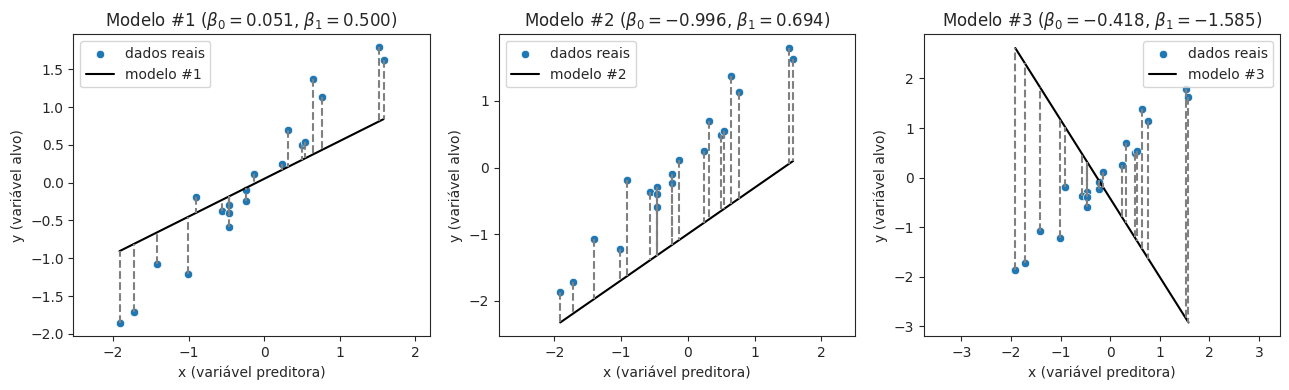

In [ ]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(13, 4))
np.random.seed(4)
for i, axe in enumerate(axes):
    ax = sns.scatterplot(x=X[:,0], y=y, label='dados reais', ax=axe)
    beta_0 = np.random.randn(1)
    beta_1 = np.random.randn(1)
    ax.set(xlabel='x (variável preditora)', ylabel='y (variável alvo)', title=f'Modelo #{i+1} ($\\beta_0 = {beta_0[0]:.3f}$, $\\beta_1 = {beta_1[0]:.3f}$)')
    y_hat = (beta_0 + X * beta_1)[:,0]
    sns.lineplot(x=X[:,0], y=y_hat, label=f'modelo #{i+1}', ax=axe, color='black')
    for j in range(len(X)):
        axe.plot([X[j,0], X[j,0]], [y[j], y_hat[j]], color='gray', linestyle='--', label='resíduos $(r_i=y_i-\hat{y}_i)$' if j == 0 else None)
    axe.axis('equal')
plt.tight_layout()
# plt.legend()
plt.show()

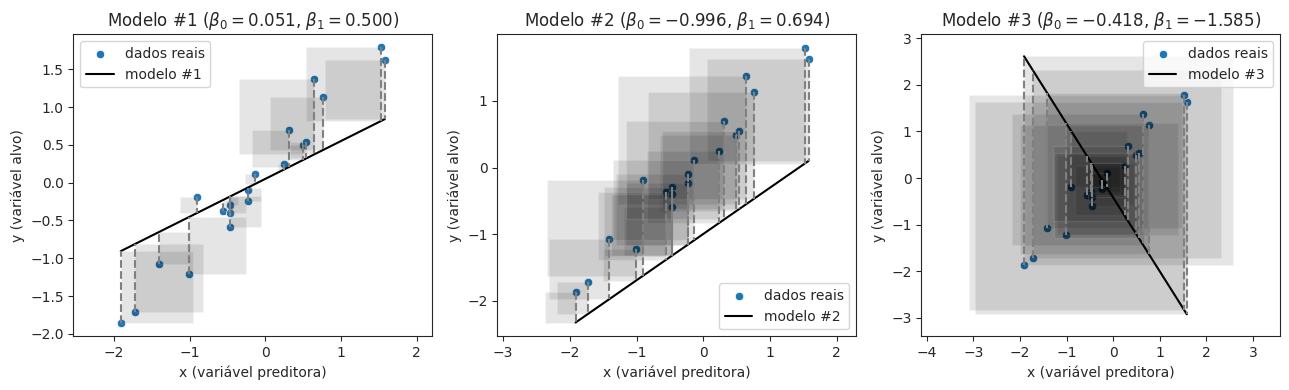

In [ ]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(13, 4))
np.random.seed(4)
for i, axe in enumerate(axes):
    ax = sns.scatterplot(x=X[:,0], y=y, label='dados reais', ax=axe)
    beta_0 = np.random.randn(1)
    beta_1 = np.random.randn(1)
    ax.set(xlabel='x (variável preditora)', ylabel='y (variável alvo)', title=f'Modelo #{i+1} ($\\beta_0 = {beta_0[0]:.3f}$, $\\beta_1 = {beta_1[0]:.3f}$)')
    y_hat = (beta_0 + X * beta_1)[:,0]
    sns.lineplot(x=X[:,0], y=y_hat, label=f'modelo #{i+1}', ax=axe, color='black')
    for j in range(len(X)):
        axe.plot([X[j,0], X[j,0]], [y[j], y_hat[j]], color='gray', linestyle='--', label='resíduos $(r_i=y_i-\hat{y}_i)$' if j == 0 else None)
        resid = np.abs(y[j] - y_hat[j])
        left = X[j, 0]
        bottom = y[j]
        if y[j] > y_hat[j]:
            bottom = y_hat[j]
            left = left-resid
        rect = plt.Rectangle((left, bottom), resid, resid, facecolor="black", alpha=0.1, label='quadrado dos resíduos' if j == 0 else None)
        axe.add_patch(rect)
    axe.axis('equal')
plt.tight_layout()
# plt.legend()
plt.show()

In [ ]:
model = LinearRegression()
model.fit(X, y)
y_hat = model.predict(X)

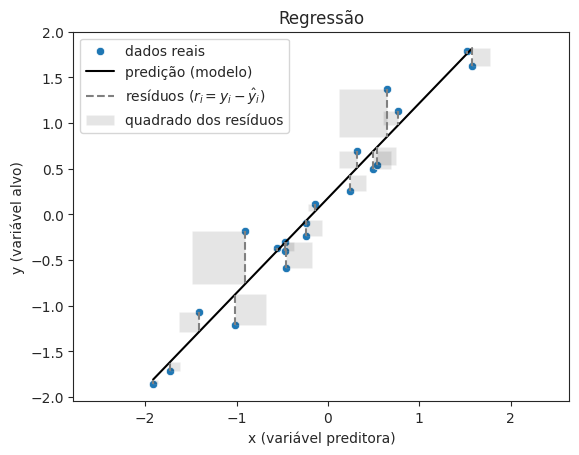

In [ ]:
fig, axes = plt.subplots()
ax = sns.scatterplot(x=X[:,0], y=y, label='dados reais')
sns.lineplot(x=X[:,0], y=y_hat, color='black', label='predição (modelo)')
ax.set(xlabel='x (variável preditora)', ylabel='y (variável alvo)', title='Regressão')
for i in range(len(X)):
    plt.plot([X[i,0], X[i,0]], [y[i], y_hat[i]], color='gray', linestyle='--', label='resíduos $(r_i=y_i-\hat{y}_i)$' if i == 0 else None)
    resid = np.abs(y[i] - y_hat[i])
    left = X[i, 0]
    bottom = y[i]
    if y[i] > y_hat[i]:
        bottom = y_hat[i]
        left = left-resid
    rect = plt.Rectangle((left, bottom), resid, resid, facecolor="black", alpha=0.1, label='quadrado dos resíduos' if i == 0 else None)
    axes.add_patch(rect)
axes.axis('equal')
plt.legend()
plt.show()

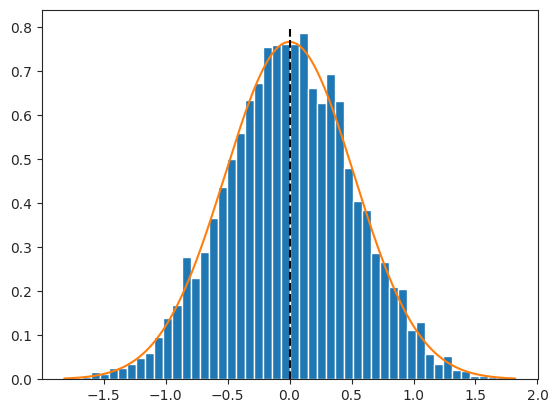

In [ ]:
# @title distribuição dos resíduos
# simulação de dados
X, y, coef = make_regression(
    n_samples=5000, random_state=42,
    n_features=1, noise=10.0,
    coef=True, bias=.5
)
y = (y - y.mean()) / y.std()

# ajuste do modelo
model = LinearRegression()
model.fit(X, y)

# predições
y_hat = model.predict(X)

# resíduos
residuos = sorted(y - y_hat)
fit = stats.norm.pdf(residuos, np.mean(residuos), np.std(residuos))
plt.hist(residuos, bins=50, density=True)
plt.plot(residuos, fit)
plt.vlines(0, ymin=0, ymax=0.8, linestyles='--', color='black')
plt.show()